In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *

#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [6]:
mock_tag_train = '_aemulus_fmaxmocks_train'
#training_dir_base = f'/home/users/ksf293/clust/results{mock_tag_train}'
training_dir_base = f'/mount/sirocco1/ksf293/clust/results{mock_tag_train}'
id_pairs_train = np.loadtxt('../tables/id_pairs_train.txt', delimiter=',', dtype=int)
id_pairs_test = np.loadtxt('../tables/id_pairs_test.txt', delimiter=',', dtype=int)

In [21]:
def load_statistics(statistic, training_dir_base, id_pairs, clust_tag='_test_0'):
    training_dir = f'{training_dir_base}/results_{statistic}'

    r_arr = []
    y_train_arr = []
    for id_pair in id_pairs:
        cosmo_id, hod_id = id_pair
        fn_y_train = f'{statistic}_cosmo_{cosmo_id}_HOD_{hod_id}{clust_tag}.dat'
        r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
        r_arr.append(r_vals)
        y_train_arr.append(y_train)
        if statistic!='xi2' and np.any(y_train <= 0):
            print(id_pair, " has 0s or negatives in data vector!")
            print(y_train)
    r_arr = np.array(r_arr)
    y_train_arr = np.array(y_train_arr)
    print(y_train_arr.shape)
    print(len(np.where(y_train_arr.flatten() <= 0)[0]))
    print(len(np.any(y_train_arr <= 0, axis=1)))
    print(np.where(np.any(y_train_arr <= 0, axis=1))[0])
    return r_arr, y_train_arr

In [8]:
def plot_statistics(statistic, r_arr, y_arr, ylabel_note='', fn_save=None, alpha=0.1,
                   rescale=False):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    r = r_arr[0] #assume all r's are the same
    
    multiplier = 1.0
    ylabel = stat_labels[statistic]
    if statistic=='xi2':
        multiplier = r**2
        #ax.set_ylim(-3,3)
        ylabel = r'$s^2$' + ylabel
            
    y_vals = multiplier * y_arr
    if rescale:
        y_vals = (y_vals - np.mean(y_vals, axis=0))/np.std(y_vals, axis=0)
            
    for i in range(len(y_vals)):
        plt.plot(r, y_vals[i], color='grey', alpha=alpha, lw=0.2)
    
    print(np.min(y_vals.flatten()))
    y_mean = np.mean(y_vals, axis=0)
    plt.plot(r, y_mean, color='k', lw=2, label='mean measurement')

    plt.xscale(scale_dict[statistic][0])
    plt.yscale(scale_dict[statistic][1])
    
    plt.xlabel(r_labels[statistic])
    plt.ylabel(ylabel + ylabel_note)
    
    handles, labels = ax.get_legend_handles_labels()
    line = Line2D([0], [0], color='grey', label='measurement on unique\ncosmo+HOD model', lw=0.5)
    handles.insert(0,line) 
    plt.legend(handles=handles, loc='best', fontsize=12)
    if fn_save is not None:
        plt.savefig(f'{plot_dir}/{fn_save}.png', bbox_inches='tight')

(4000, 9)
0
4000
[]
1.236679


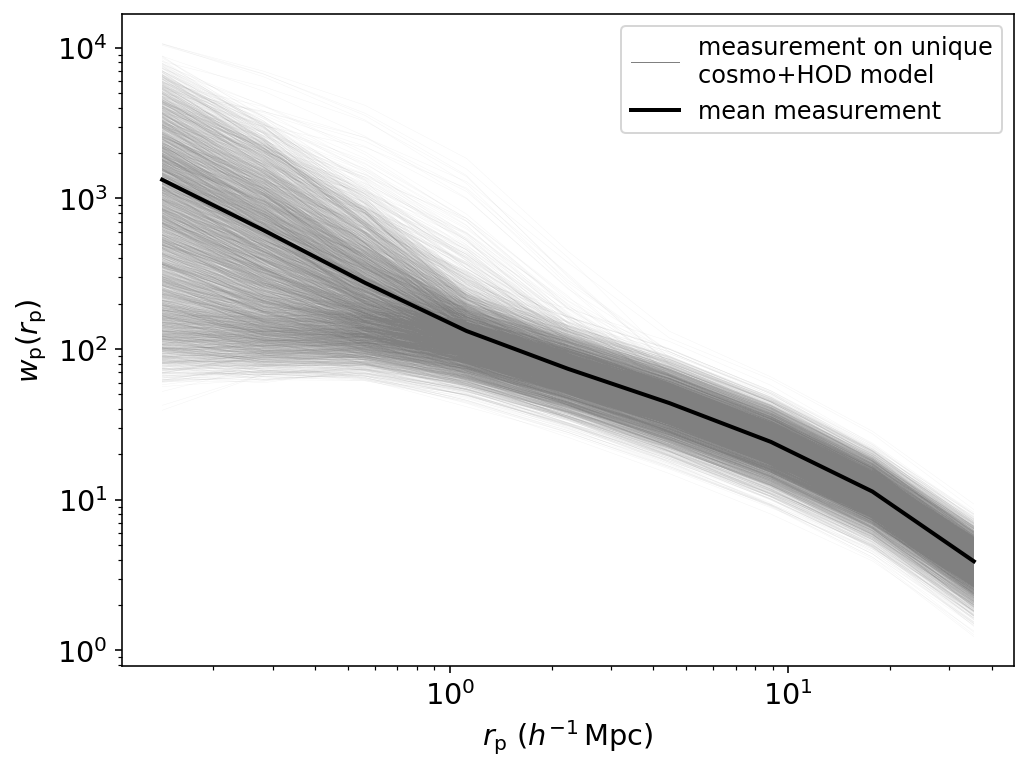

In [9]:
%matplotlib inline
statistic = 'wp'
r_arr, y_train_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
plot_statistics(statistic, r_arr, y_train_arr)

[  22 2228]  has 0s or negatives in data vector!
[-1.          6.179062    4.926889    5.792646    4.662768    2.611118
  1.001902    0.2818457   0.05186022]
[  32 3208]  has 0s or negatives in data vector!
[-1.          8.042041    7.750223    8.638119    6.129745    2.84496
  0.9582422   0.2759266   0.05901244]
(4000, 9)
2
4000
[2228 3208]
-1.0


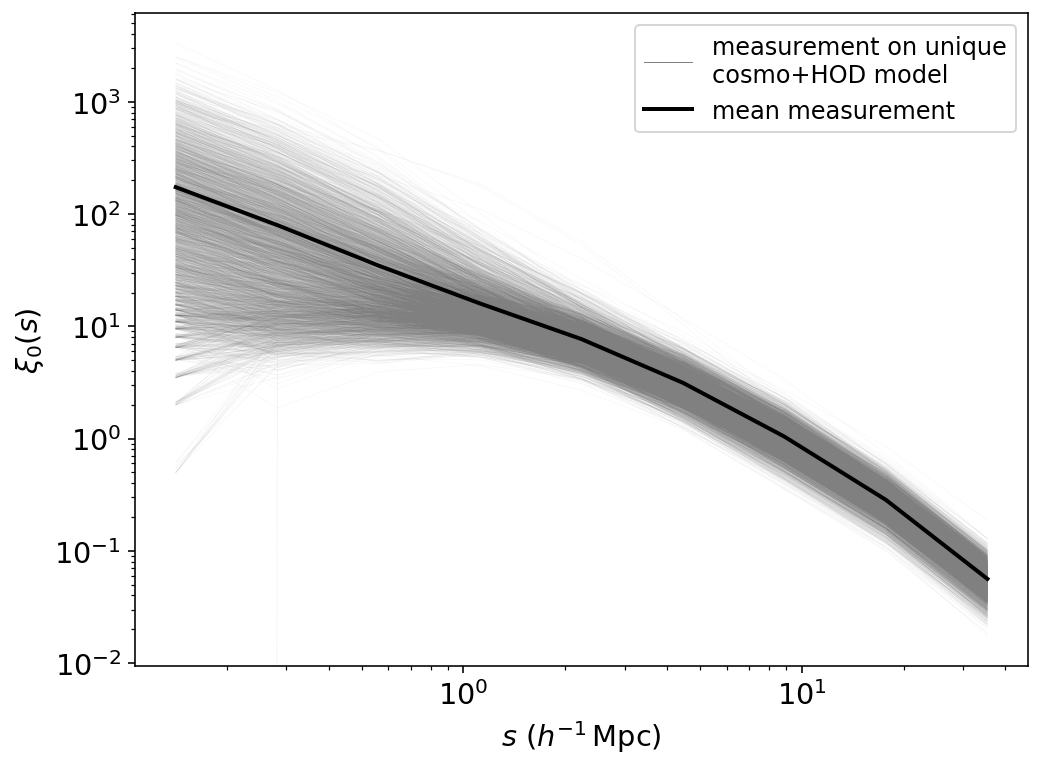

In [23]:
%matplotlib inline
statistic = 'xi'
r_arr, y_train_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
plot_statistics(statistic, r_arr, y_train_arr)

(4000, 9)
12586
4000
[   0    1    2 ... 3997 3998 3999]
-149.9706743704132


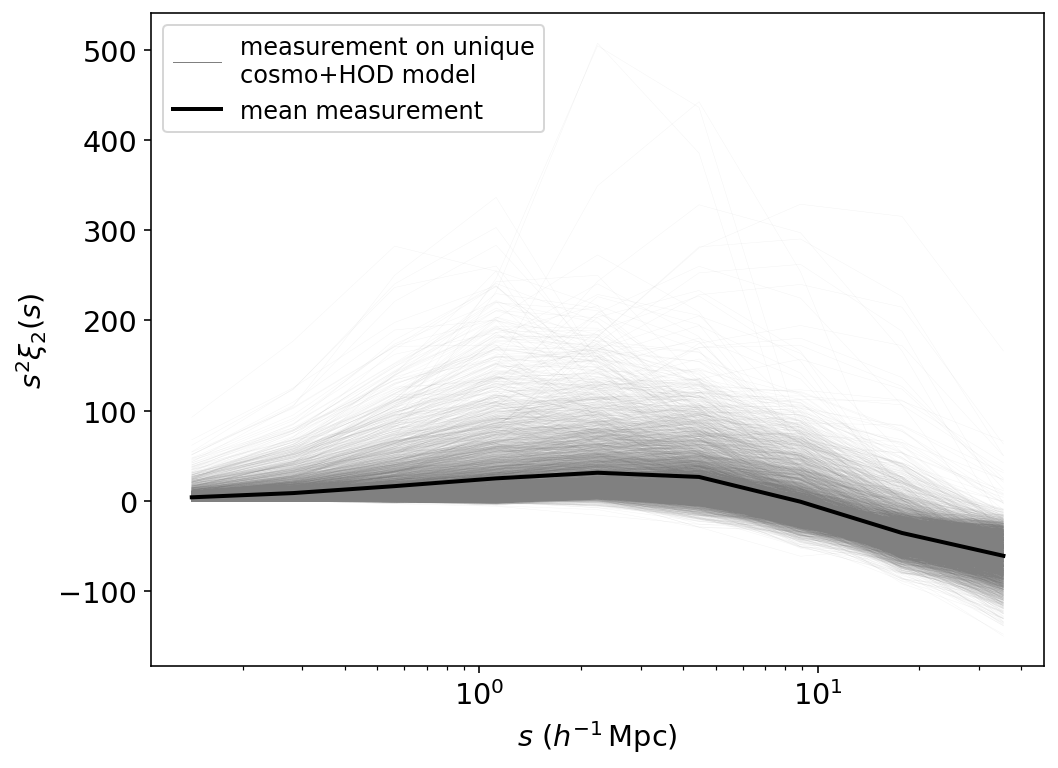

In [11]:
%matplotlib inline
statistic = 'xi2'
r_arr, y_train_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
plot_statistics(statistic, r_arr, y_train_arr)

[  1 156]  has 0s or negatives in data vector!
[9.08905e-01 5.12653e-01 1.38391e-01 5.72460e-02 1.04500e-02 1.99600e-03
 3.11000e-04 9.00000e-06 0.00000e+00]
[  1 199]  has 0s or negatives in data vector!
[9.09761e-01 5.20884e-01 1.47619e-01 6.54360e-02 1.39770e-02 3.13900e-03
 4.57000e-04 9.00000e-06 0.00000e+00]
[  2 258]  has 0s or negatives in data vector!
[9.08672e-01 5.15364e-01 1.45792e-01 6.29180e-02 1.31000e-02 2.77800e-03
 5.02000e-04 3.10000e-05 0.00000e+00]
[  2 261]  has 0s or negatives in data vector!
[9.09447e-01 5.12861e-01 1.36676e-01 5.49210e-02 9.36400e-03 1.45200e-03
 1.66000e-04 4.00000e-06 0.00000e+00]
[  4 491]  has 0s or negatives in data vector!
[9.10611e-01 5.24573e-01 1.50021e-01 6.67290e-02 1.41890e-02 3.21000e-03
 5.40000e-04 1.80000e-05 0.00000e+00]
[  6 646]  has 0s or negatives in data vector!
[9.09693e-01 5.12183e-01 1.33143e-01 5.21450e-02 8.72500e-03 1.54800e-03
 1.91000e-04 1.90000e-05 0.00000e+00]
[  7 735]  has 0s or negatives in data vector!
[9.10

0.0


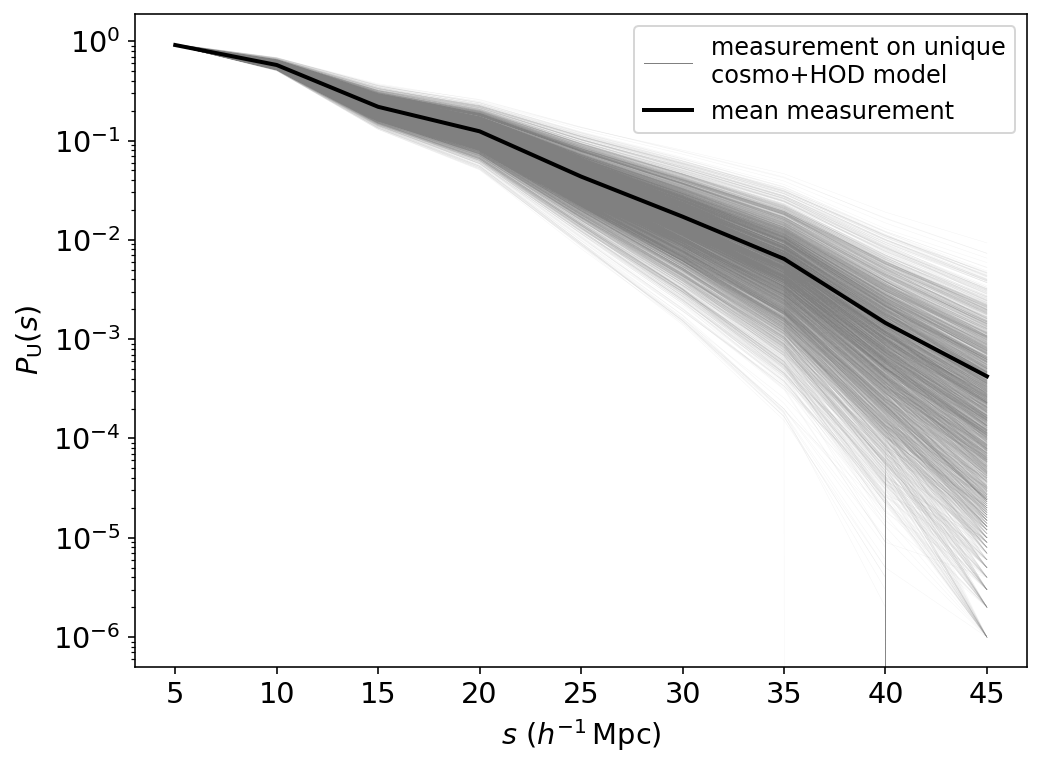

In [22]:
%matplotlib inline
statistic = 'upf'
r_arr, y_train_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
plot_statistics(statistic, r_arr, y_train_arr)

[  22 2228]  has 0s or negatives in data vector!
[  32 3208]  has 0s or negatives in data vector!
(4000, 9)
2
4000
[2228 3208]
0.0


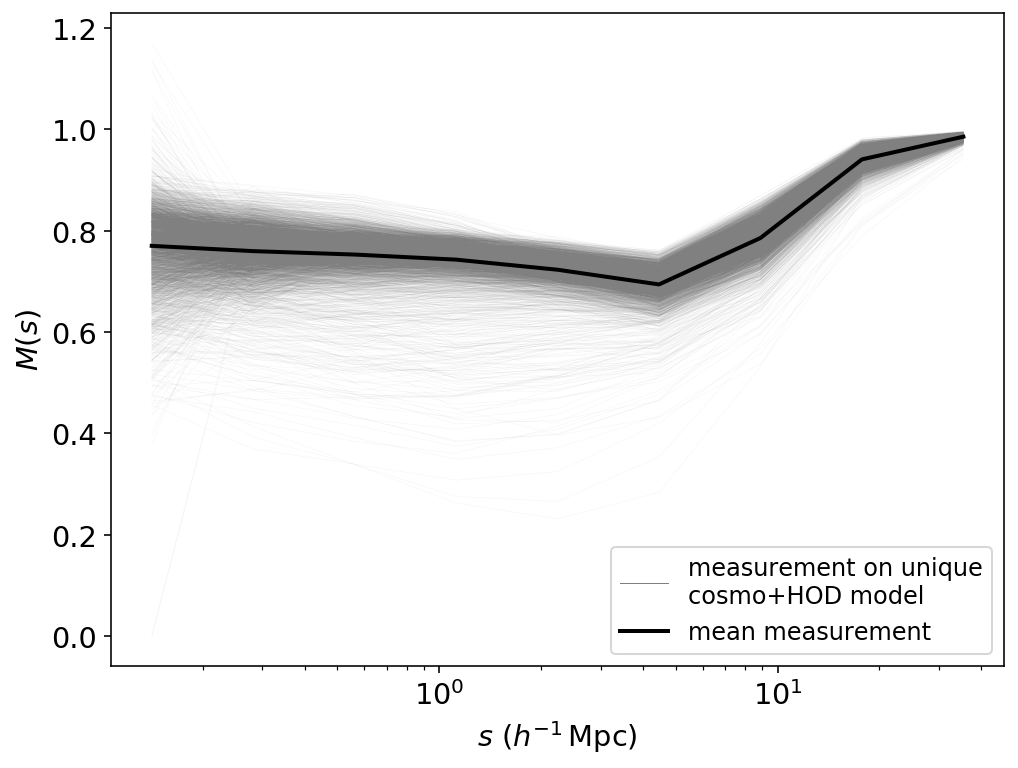

In [15]:
%matplotlib inline
statistic = 'mcf'
r_arr, y_train_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
plot_statistics(statistic, r_arr, y_train_arr)

## Test set

In [16]:
mock_tag_test = '_aemulus_fmaxmocks_test_mean'
testing_dir_base = f'/mount/sirocco1/ksf293/clust/results{mock_tag_test}'

(700, 9)
0
700
[]
1.538657


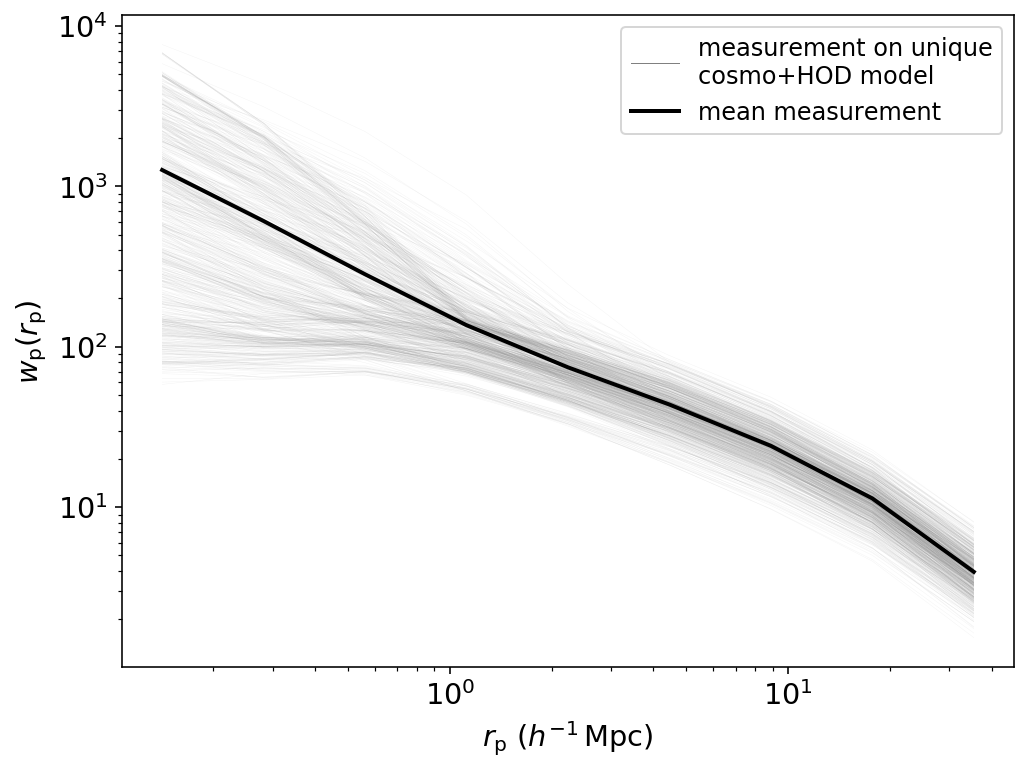

In [17]:
statistic = 'wp'
r_arr, y_test_arr = load_statistics(statistic, testing_dir_base, id_pairs_test, clust_tag='_mean')
plot_statistics(statistic, r_arr, y_test_arr)

(700, 9)
0
700
[]
0.02091358


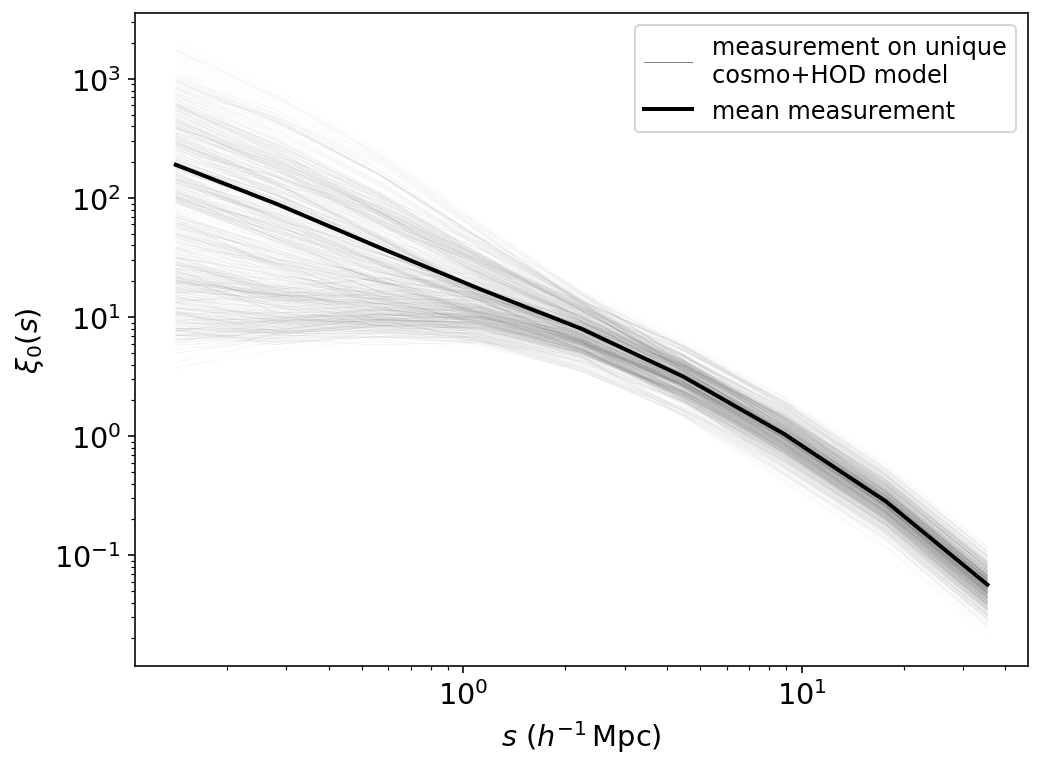

In [18]:
statistic = 'xi'
r_arr, y_test_arr = load_statistics(statistic, testing_dir_base, id_pairs_test, clust_tag='_mean')
plot_statistics(statistic, r_arr, y_test_arr)

In [20]:
print(np.sum(np.isfinite(y_test_arr.flatten()))/len(y_test_arr.flatten()))

1.0
